In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
import gradio as gr
import numpy as np
from PIL import Image

# DOSYA YOLU AYARLARI 

MODEL_DOSYA_ADI = os.path.join("models", "traffic_classifier_v2.h5") 

# ÖRNEK RESİM LİSTESİ 
ornek_resimler_listesi = [
    [os.path.join("Test", "00074.png")],
    [os.path.join("Test", "00915.png")],
    [os.path.join("Test", "01570.png")],
    [os.path.join("Test", "00179.png")],
    [os.path.join("Test", "02010.png")],
    [os.path.join("Test", "12460.png")],
    [os.path.join("Test", "08154.png")],
    [os.path.join("Test", "04554.png")],
    [os.path.join("Test", "03480.png")],
    [os.path.join("Test", "07618.png")]
]

# Sınıf İsimleri
classes = { 
    0:'Hız Limiti (20km/s)',
    1:'Hız Limiti (30km/s)',
    2:'Hız Limiti (50km/s)', 
    3:'Hız Limiti (60km/s)',
    4:'Hız Limiti (70km/s)',
    5:'Hız Limiti (80km/s)',
    6:'Hız Limiti Bitişi (80km/s)',
    7:'Hız Limiti (100km/s)',
    8:'Hız Limiti (120km/s)',
    9:'Sollama Yasak',
    10:'Kamyonlar için Sollama Yasak',
    11:'Ana Yol Tali Yol Kavşağı',
    12:'Ana Yol',
    13:'Yol Ver',
    14:'DUR (Stop)',
    15:'Taşıt Giremez',
    16:'Kamyon Giremez',
    17:'Girişi Olmayan Yol',
    18:'Dikkat', 
    19:'Sola Tehlikeli Viraj',
    20:'Sağa Tehlikeli Viraj',
    21:'Virajlı Yol',
    22:'Engebeli Yol',
    23:'Kaygan Yol',
    24:'Yol Daralması (Sağdan)',
    25:'Yol Çalışması',
    26:'Trafik Işıkları',
    27:'Yaya Geçidi',
    28:'Okul Geçidi',
    29:'Bisiklet Geçidi',
    30:'Buzlanma Tehlikesi',
    31:'Vahşi Hayvan Çıkabilir', 
    32:'Hız Sınırı ve Yasakların Sonu',
    33:'Sağa Mecburi Yön',
    34:'Sola Mecburi Yön', 
    35:'İleri Mecburi Yön',
    36:'İleri ve Sağa Mecburi Yön',
    37:'İleri ve Sola Mecburi Yön',   
    38:'Sağdan Gidiniz',
    39:'Soldan Gidiniz',
    40:'Dönel Kavşak', 
    41:'Sollama Yasağı Sonu',
    42:'Kamyonlar İçin Sollama Yasağı Sonu'
}

# 1. MODELİ YÜKLEME 
print("Model yükleniyor...")
try:
    if not os.path.exists(MODEL_DOSYA_ADI):
        print(f"HATA: '{MODEL_DOSYA_ADI}' bulunamadı! Lütfen 'models' klasörünü kontrol et.")
        input_shape = (30, 30) 
    else:
        model = load_model(MODEL_DOSYA_ADI)
        input_shape = model.input_shape[1:3]
        print(f"✅ Model başarıyla yüklendi. Beklenen input boyutu: {input_shape}")
except Exception as e:
    print(f"BİR HATA OLUŞTU: {e}")
    input_shape = (30, 30)

# 2. TAHMİN FONKSİYONU
def trafik_tahmin(image):
    if image is None:
        return None
    
    # Resmi modele hazırla
    image = image.resize(input_shape)
    img_array = np.array(image) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # Tahmin et
    prediction = model.predict(img_array)[0]
    
    # Sonuçları düzenle
    results = {}
    top_indices = prediction.argsort()[-3:][::-1]
    
    for i in top_indices:
        label = classes.get(i, f"Sınıf {i}")
        score = float(prediction[i])
        results[label] = score
        
    return results

# 3. ARAYÜZ (GRADIO) 
with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown("# 🚦 Trafik Levhası Tanıma Sistemi")
    gr.Markdown("Aşağıdaki **örnek resimlere tıklayarak** hızlıca test edebilir veya kendi resminizi yükleyebilirsiniz.")
    
    with gr.Row():
        with gr.Column():
            img_input = gr.Image(type="pil", label="Resim Yükle")
            btn_predict = gr.Button("Analiz Et", variant="primary")
        
        with gr.Column():
            lbl_output = gr.Label(num_top_classes=3, label="Tahmin Sonuçları")
    
    
    #  tıklanabilir örnekler 
    examples = gr.Examples(
        examples=ornek_resimler_listesi, 
        inputs=img_input,               
        outputs=lbl_output,             
        fn=trafik_tahmin,               
        cache_examples=False,            
        label="Test Etmek İçin Örnek Levhalara Tıklayın"
    )
    # -------------------------------------------
    
    btn_predict.click(trafik_tahmin, inputs=img_input, outputs=lbl_output)

# BAŞLAT
demo.launch()

Model yükleniyor...
✅ Model başarıyla yüklendi. Beklenen input boyutu: (30, 30)


C:\Users\Furkan\AppData\Local\Temp\ipykernel_12924\1781726347.py:112: UserWarning: The parameters have been moved from the Blocks constructor to the launch() method in Gradio 6.0: theme. Please pass these parameters to launch() instead.
  with gr.Blocks(theme=gr.themes.Soft()) as demo:


* Running on local URL:  http://127.0.0.1:7864
* To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


1. Veriler Yükleniyor...
2. Toplam 12630 resim işleniyor (Renk düzeltmesi ile)...
3. Tahmin Yapılıyor...
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

--- NİHAYET DOĞRU SONUÇLAR ---


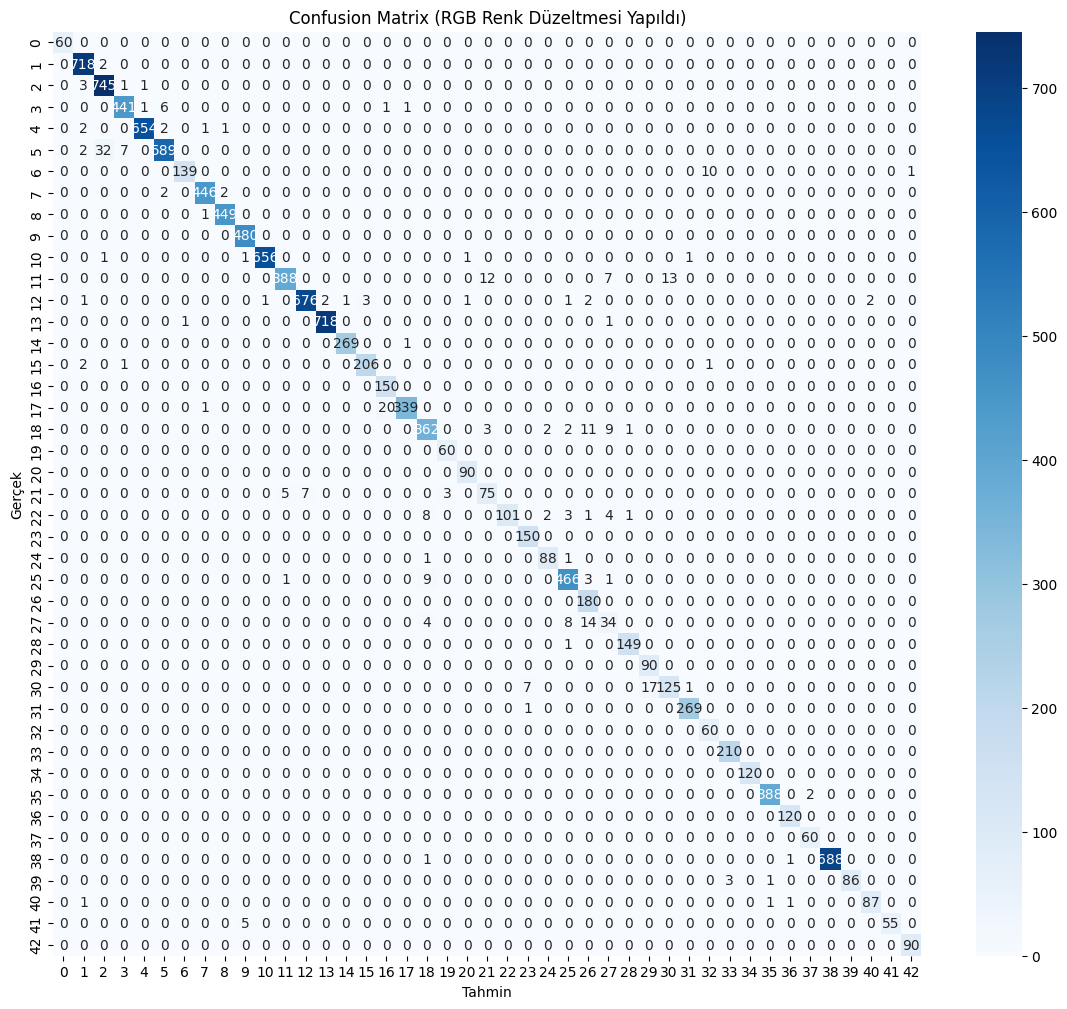

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.98      1.00      0.99       720
           2       0.96      0.99      0.97       750
           3       0.98      0.98      0.98       450
           4       1.00      0.99      0.99       660
           5       0.98      0.93      0.96       630
           6       0.99      0.93      0.96       150
           7       0.99      0.99      0.99       450
           8       0.99      1.00      1.00       450
           9       0.99      1.00      0.99       480
          10       1.00      0.99      1.00       660
          11       0.98      0.92      0.95       420
          12       0.99      0.98      0.98       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.99      0.98      0.98       210
          16       0.88      1.00      0.93       150
          17       0.99    

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report


MODEL_YOLU = "models/traffic_classifier_v2.h5"
CSV_DOSYASI = "data/Test.csv"
TEST_KLASORU = "." 


print("1. Veriler Yükleniyor...")
model = load_model(MODEL_YOLU)
data = pd.read_csv(CSV_DOSYASI)


path_col = "Path" if "Path" in data.columns else "Filename"
class_col = "ClassId"

if path_col in data.columns and class_col in data.columns:
    imgs = data[path_col].values
    y_true = data[class_col].values
    
    data_list = []
    valid_indices = []
    
    print(f"2. Toplam {len(imgs)} resim işleniyor (Renk düzeltmesi ile)...")

    for i, img_name in enumerate(imgs):
        img_path = os.path.join(TEST_KLASORU, img_name)
        try:
            
            image = cv2.imread(img_path)
            
            if image is not None:
               
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                
                image = cv2.resize(image, (30, 30))
                data_list.append(image)
                valid_indices.append(i)
        except:
            pass

    if len(data_list) > 0:
        X_test = np.array(data_list)
        X_test = X_test / 255.0 
        
        y_true = y_true[valid_indices]

        print("3. Tahmin Yapılıyor...")
        preds = model.predict(X_test, verbose=1)
        y_pred = np.argmax(preds, axis=1)
        
       
        print("\n--- NİHAYET DOĞRU SONUÇLAR ---")
        
        # Confusion Matrix
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(14, 12))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix (RGB Renk Düzeltmesi Yapıldı)')
        plt.ylabel('Gerçek')
        plt.xlabel('Tahmin')
        plt.show()

        
        print(classification_report(y_true, y_pred))
        
        
        acc = np.sum(y_pred == y_true) / len(y_true)
        print(f"\nGENEL DOĞRULUK ORANI (ACCURACY): %{acc*100:.2f}")

    else:
        print("Resimler okunamadı.")
else:
    print("CSV sütun hatası.")